### Soru
Veri setini yükle, ilk 10 satırını göster.

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import matplotlib as mpl 

import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

flights = sns.load_dataset("flights")
flights.head(10)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


### Soru
Veri setinin satır ve sütun sayısını öğren.

In [13]:
flights.shape

(144, 3)

### Soru
Veri setinde hangi yıllar var, toplam kaç farklı yıl içeriyor?

In [14]:
flights['year'].unique(), flights['year'].nunique()

(array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
        1960], dtype=int64),
 12)

### Soru
Veri setinde hangi aylar var, ayların dağılımını yazdır.

In [15]:
flights['month'].unique()

['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

### Soru
Veri tiplerini ve null değer olup olmadığını kontrol et.

In [16]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


### Soru
Yıllara göre toplam yolcu sayısını hesapla ve tablo olarak göster.

In [17]:
flights.groupby('year')['passengers'].sum()

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64

### Soru
Aylara göre ortalama yolcu sayısını bul. En yüksek ve en düşük ortalamaya sahip ay hangisi?

In [18]:
flights.groupby('month')['passengers'].mean().sort_values(ascending=False)

month
Jul    351.333333
Aug    351.083333
Jun    311.666667
Sep    302.416667
May    271.833333
Mar    270.166667
Apr    267.083333
Oct    266.583333
Dec    261.833333
Jan    241.750000
Feb    235.000000
Nov    232.833333
Name: passengers, dtype: float64

### Soru
Tüm veri setindeki yolcu sayılarının betimsel istatistiklerini (describe) çıkar.

In [19]:
flights['passengers'].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

### Soru
Yıllara göre yolcu sayısının toplamını çubuk grafik ile çiz.

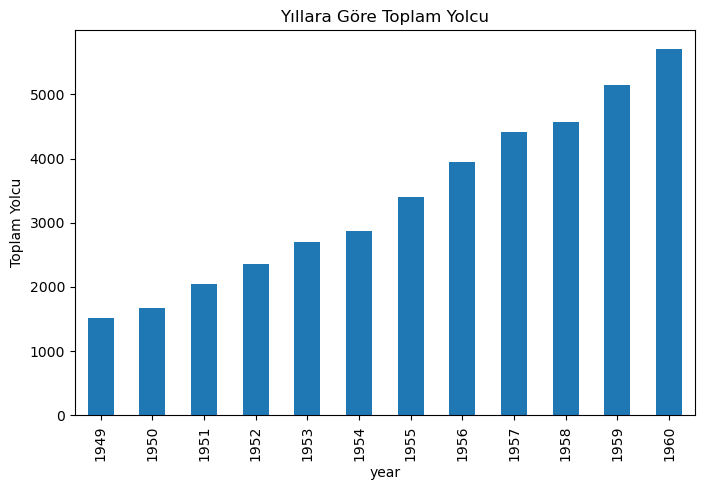

In [20]:
import matplotlib.pyplot as plt
flights.groupby('year')['passengers'].sum().plot(kind='bar', figsize=(8,5))
plt.ylabel('Toplam Yolcu')
plt.title('Yıllara Göre Toplam Yolcu')
plt.show()

### Soru
Aylara göre ortalama yolcu sayısını sütun grafik ile görselleştir.

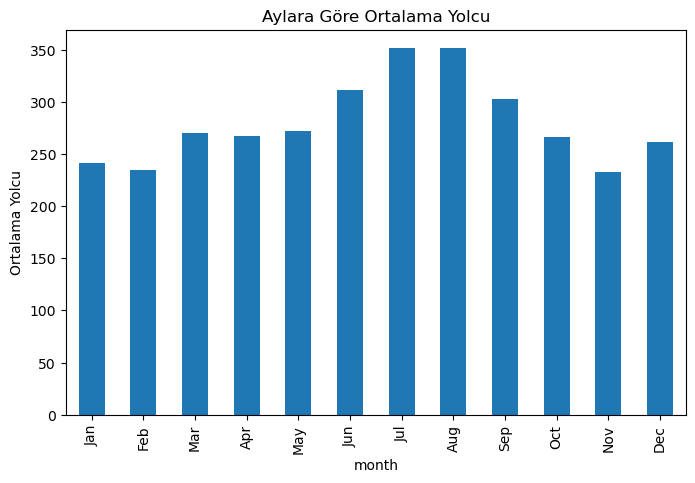

In [21]:
flights.groupby('month')['passengers'].mean().plot(kind='bar', figsize=(8,5))
plt.ylabel('Ortalama Yolcu')
plt.title('Aylara Göre Ortalama Yolcu')
plt.show()

### Soru
Her yıl için yolcu sayısının çizgi grafiğini çiz (zaman serisi görünümü).

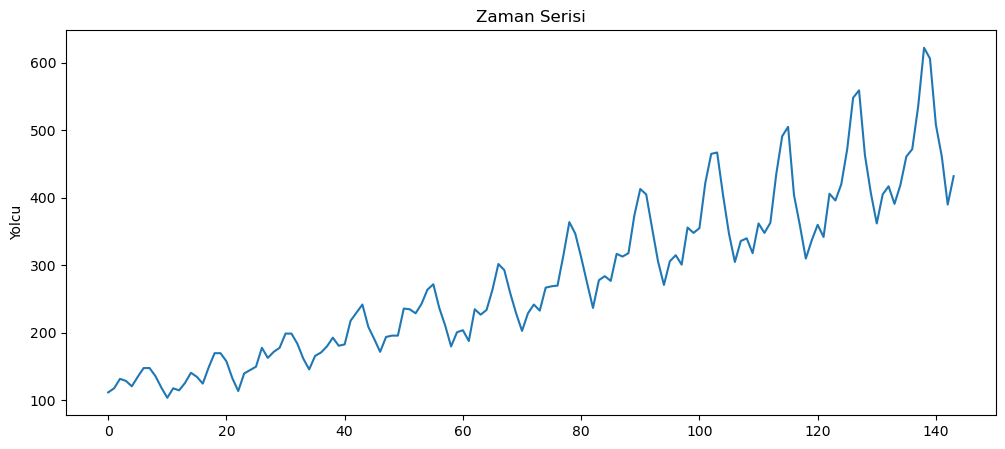

In [22]:
plt.figure(figsize=(12,5))
plt.plot(flights['passengers'])
plt.ylabel('Yolcu')
plt.title('Zaman Serisi')
plt.show()

### Soru
Yolcu sayısının dağılımını histogram ile göster.

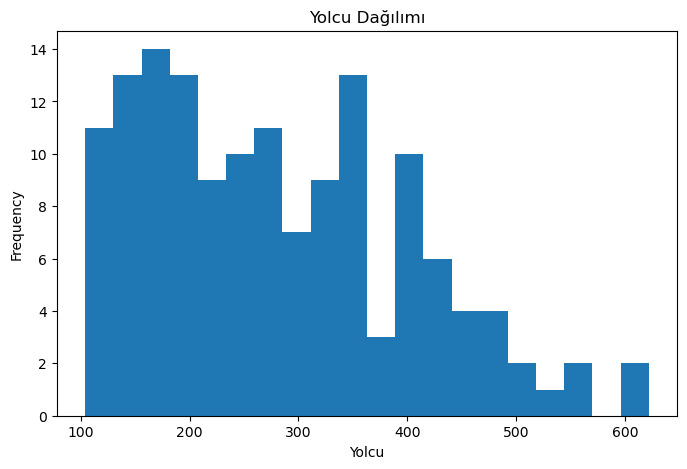

In [25]:
flights['passengers'].plot(kind='hist', bins=20, figsize=(8,5))
plt.xlabel('Yolcu')
plt.title('Yolcu Dağılımı')
plt.show()

### Soru
Her yıl için ay bazında boxplot çiz, hangi yıllarda değişkenlik yüksek görünüyor?

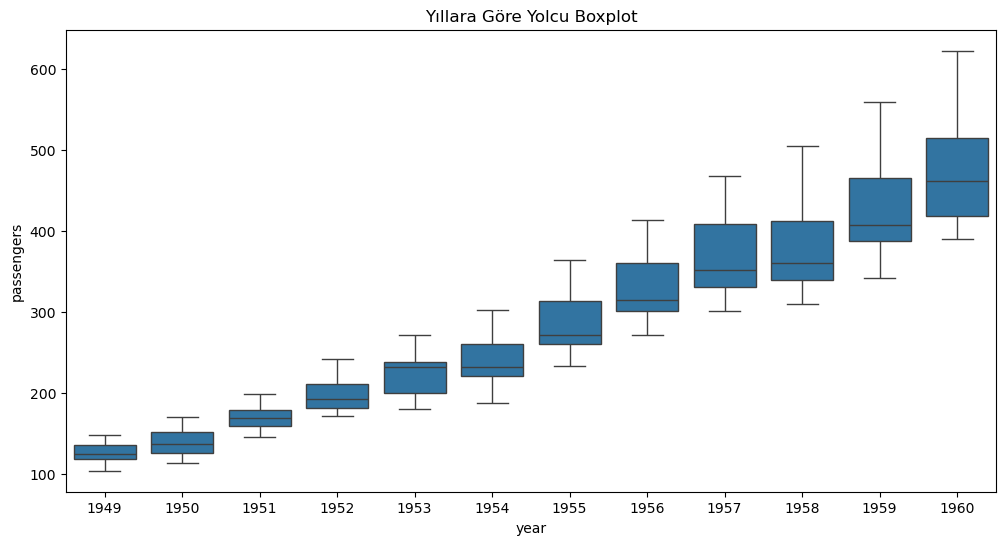

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x='year', y='passengers', data=flights)
plt.title('Yıllara Göre Yolcu Boxplot')
plt.show()

### Soru
Zaman serisine 12 aylık hareketli ortalama uygula ve çizgi grafikte hem orijinal hem de ortalamayı birlikte göster.

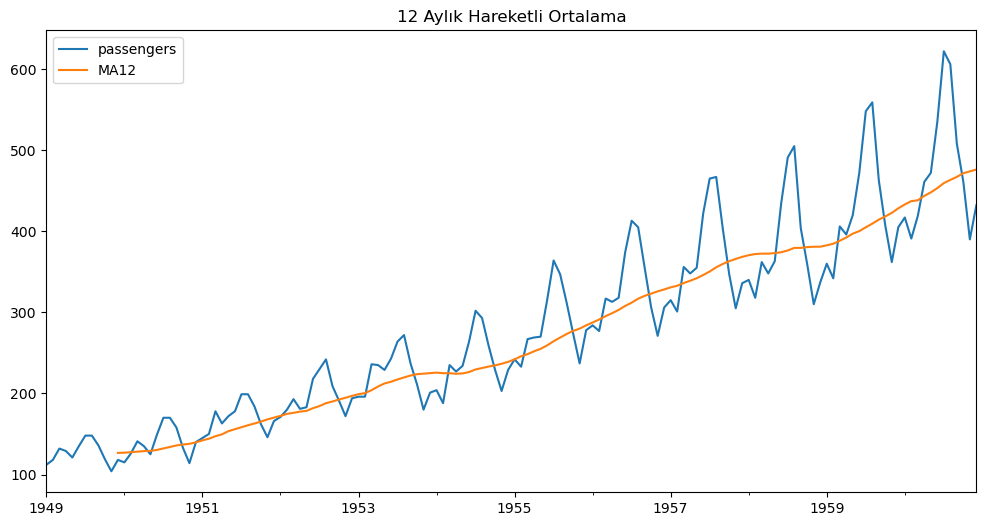

In [27]:
flights_ts = flights.set_index(pd.date_range(start='1949-01', periods=len(flights), freq='M'))
flights_ts['MA12'] = flights_ts['passengers'].rolling(12).mean()
flights_ts[['passengers','MA12']].plot(figsize=(12,6))
plt.title('12 Aylık Hareketli Ortalama')
plt.show()